<div align="center">
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ<br>
ІНСТИТУТ ПРИКЛАДНОГО СИСТЕМНОГО АНАЛІЗУ<br>
НАЦІОНАЛЬНОГО ТЕХНІЧНОГО УНІВЕРСИТЕТУ УКРАЇНИ<br>
«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ»<br>
КАФЕДРА МАТЕМАТИЧНИХ МЕТОДІВ СИСТЕМНОГО АНАЛІЗУ<br>
</div>
<br><br><br><br><br><br><br><br>
<center><font size="+2">Лабораторна робота №3</font></center>
<center>З курсу "Чисельні методи"</center>
<center>Тема "Крайова умова"</center>
<br><br><br><br>
<div align="right">
    <strong>Виконав:</strong><br>
    Студент группи КА-81<br>
    Єрко А.В.<br><br>
    <strong>Прийняла:</strong><br>
    Хоменко О.В.
</div>
<br><br><br><br><br><br><br>
<center>Київ - 2020</center>


<hr>

### Мета роботи:
набути вміння та досвід використання методів
розв'язання лінійних крайових задач.
# Завдання:
1. Розв'язати крайову задачу з вашого варіанту методом скінченних різниць з
кроком $h = \frac{b-a}{n}$, де $n$ не менше 3. Для цього виконати наступні етапи.
    1.  дискретизація області зміни аргументу $x$;
    1.  перехід від неперервної диференціальної математичної моделі до
скінченно-різницевої моделі;
    1.  розв'язати утворену систему рівнянь методом прогонки або іншим
методом. Для цього скласти відповідну програму, яку включити до звіту;
    1. записати результат у вигляді таблиці.

2. Розв'язати ту саму крайову задачу методом колокацій або методом
Гальоркіна на вибір (можна додавати фото розв'язання, складати програму
не потрібно). За необхідності для розв'язання систем рівнянь, які
утворюються в ході розв'язування задачі, використовувати програми,
складені при вивченні методів розв'язання систем рівнянь або використати
будь-який онлайн калькулятор. Записати отриманий наближений розв'язок.
Побудувати графік отриманого наближеного розв'язку.

1. Зробити висновок, надіслати роботу в форматі pdf.

# Варіант 4
Дана двоточкова крайова задача виду
$$ y'' + p(x)y' + q(x)y = f(x);\;\;
\begin{cases}
    \alpha_0 y(a) + \alpha_1 y'(a)= A; \\
    \beta_0 y(b) + \beta_1 y'(b) = B;
\end{cases}
\;\;x\in[a,b];$$
Звичайне диференціальне рівняння другого порядку:
$$y'' + 2y' - \frac{y}{x} = 3$$
Крайові умови:
$$
\begin{cases}
    y(0.2) = 2 \\
    0.5y(0.5) - y'(0.5) = 1
\end{cases}
$$
Відрізок: $$[0.2; 0.5]$$


In [1]:
from IPython.display import display, Math, Markdown
import array_to_latex as a2l
import pandas as pd
pd.options.display.float_format = '{:,g}'.format
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 1. Метод скінченних різниць
## 1.1. Дискретизація області
Розіб'ємо область зміни аргументу $x$ на $n=6$ частини,
тобто $$h = \frac{b-a}{n} = \frac{0.3}{6} = 0.05$$
Обчислимо значення точок сітки та коефіцієнтів в них:

In [2]:
h = 0.05

x = np.arange(0.2, 0.5+h/2, h)
p = np.full(x.shape, 2)
q = -1/x
display(pd.DataFrame({'$x_i$':x, '$p_i$':p, r'$q_i = -\frac{1}{x_i}$':q}).T)

,0,1,2,3,4,5,6
$x_i$,0.2,0.25,0.3,0.35,0.4,0.45,0.5
$p_i$,2,2,2,2,2,2,2
$q_i = -\frac{1}{x_i}$,-5,-4,-3.33333,-2.85714,-2.5,-2.22222,-2


## 1.2. Перехід до скінченно-різницевої моделі
Відомо[Лекція 12], рівняння $y''(x_i) + p_iy'(x_i) +q_iy(x_i) = f_i$
наближується рівнянням 
$$
    \left( 1 + \frac{h}{2}p_i \right)y_{i+1}
    -\left( 2 - h^2 q_i \right) y_i
    +\left( 1 - \frac{h}{2}p_i \right)y_{i-1}
    = h^2 f_i
$$
при $i = \overline{1,n-1}$.

Рівняння при $i=0$ та $i=n$ отримуються апроксимацією крайових умов:
$$(h\alpha_0 - \alpha_1)y_0 + \alpha_1y_1 = Ah$$
$$-\beta_1y_{n-1} + (h\beta_0 + \beta_1)y_n = Bh$$

Обчислимо значення коефіцієнтів різницевих рівнянь _(в проміжних результатах округлено до 4 знаків після коми)_

In [3]:
# знайдемо коефіцієнти різницевих рівнянь
a = 1 - p*h/2
b = -(2 - h**2 * q)
c = p*h/2 + 1
# для i=0
a[0] = 0
b[0] = h
c[0] = 0
# для i=n
a[-1] = 1
b[-1] = h*0.5 - 1
c[-1] = 0
# права частина
f = np.array([2*h] + [3*h**2]*(len(x)-2) + [h])

# вивід рівнянь
display(Markdown("**Маємо систему рівняннь:**"))
string = r"\begin{cases}\\"
for i in range(0,len(x)):
    if c[i] != 0: string += r" %.4g\cdot y_{%d} "%(c[i],i+1)
    if b[i] != 0: string += r"%.4g\cdot y_{%d} "%(b[i],i)
    if a[i] != 0: string += r"%+.4g\cdot y_{%d} "%(a[i],i-1)
    string += r"= %.4g"%(f[i])
    string += r'\\'
string += r"\end{cases}"
display(Math(string))

**Маємо систему рівняннь:**

<IPython.core.display.Math object>

In [4]:
A = np.diag(a[1:],-1) + np.diag(b,0) + np.diag(c[:-1],1)

# вивід рівняння
display(Markdown("**В матричному вигляді:**"))
display(Math(
    a2l.to_ltx(A, frmt = '{:.4g}', arraytype = 'pmatrix', print_out=False)
    + r"\cdot\vec{y} = "
    + a2l.to_ltx(f, frmt='{:.4g}', arraytype = 'pmatrix', print_out=False, row=False)
))

**В матричному вигляді:**

<IPython.core.display.Math object>

## 1.3. Розв'язок методом прогонки і результати

In [5]:
def tridiagonal_matrix_algorithm(A, f):
    '''
    Розв'язок методом прогонки систем виду Ax = f 
    де A - тридіагональна матриця, тобто
    b1 c1 0  0  ... 0
    a2 b2 c2 0  ... 0
    0  a3 b2 c3 ... 0
    ...       ...   0
    0     ...   bn cn

    Аргументи:
    A - np.ndarray розмірності (n, n)
    f - np.ndarray розмірності (n)

    Повертає розв'язок цієї системи
    '''
    #витяг діагоналей
    f = f.copy()
    b = np.diag(A)
    a = np.hstack(([0],np.diag(A, -1)))
    c = np.hstack((np.diag(A, 1), [0]))
    #пряма прогонка
    c[0] = c[0]/b[0]
    f[0] = f[0]/b[0]
    for i in range(1, len(c)):
        c[i] = c[i] / (b[i] - c[i-1]*a[i])
        f[i] = (f[i] - f[i-1]*a[i]) / (b[i] - c[i-1]*a[i])
    #зворотня
    for i in reversed(range(0, len(c)-1)):
        f[i] = f[i] - c[i]*f[i+1]
    return f

In [6]:
y_h = tridiagonal_matrix_algorithm(A, f)

display(Markdown('### Результати:'))
display(pd.DataFrame({'$x_i$':x, '$y_i$':y_h}).T)

### Результати:

,0,1,2,3,4,5,6
$x_i$,0.2,0.25,0.3,0.35,0.4,0.45,0.5
$y_i$,2,1.85394,1.74659,1.67047,1.6201,1.59132,1.58084


### Перевіримо:

In [7]:
np.linalg.solve(A, f)

array([2.        , 1.85393936, 1.74658868, 1.67046654, 1.62010071,
       1.59131794, 1.58083891])

## 1.4* Оцінка точності
Для оцінки точності застосовують наближену рівність
$$\left|y(x_i)-y_i^{h/2}\right| \approx \frac{1}{3}\left|y_i^{h} - y_i^{h/2}\right|$$
Отже, отримані результати можемо оцінити використовуючи результати для кроку $2h=0.10$

In [8]:
def finite_difference_method(h):
    '''
    Повертає наближений розв'язок для крайової задачі Варіанту 4
    '''
    x_2 = np.arange(0.2, 0.5+h/2, h)
    p = np.full(x_2.shape, 2);  q = -1/x_2
    # знайдемо коефіцієнти різницевих рівнянь
    a = 1 - p*h/2
    b = -(2 - h**2*q)
    c = p*h/2 + 1

    a[0] = 0;  a[-1] = 1
    b[0] = h;  b[-1] = h*0.5 - 1
    c[0] = 0;  c[-1] = 0

    # права частина
    f = np.array([2*h] + [h**2]*(len(x_2)-2) + [h])
    A = np.diag(a[1:],-1) + np.diag(b,0) + np.diag(c[:-1],1)
    y_h2 = tridiagonal_matrix_algorithm(A, f)
    return x_2, y_h2

In [9]:
x_2,y_h2 = finite_difference_method(0.1)
rez = pd.DataFrame({
    '$x_i$':x_2, 
    '$y_i^{0.05}$':y_h[::2], 
    '$y_i^{0.1}$':y_h2,
    r'$\frac{1}{3}|y_i^{0.1} - y_i^{0.05}|$' : np.abs(y_h[::2] - y_h2)/3
}).T

display(rez)

,0,1,2,3
$x_i$,0.2,0.3,0.4,0.5
$y_i^{0.05}$,2,1.74659,1.6201,1.58084
$y_i^{0.1}$,2,1.82864,1.75295,1.73994
$\frac{1}{3}|y_i^{0.1} - y_i^{0.05}|$,0,0.0273516,0.0442822,0.0530352


 Таким чином, для даної задачі, порядок точності метода скінченних різниць
 з кроком $0.05$ не перебільшує $\varepsilon = 0.053$

# 2. Метод колокацій

Метод колокацій полягає в пошуку наближеного розв'язку у вигляді функції
$$
    y_n := \varphi_0(x) + \sum^n_{i=1}c_i\varphi_i(x)
$$
де $\varphi_0(x)$ задовільняє крайові умови, 
а $\varphi_i(x)$ задовільняють однорідні крайові умови.

Коефієнти $c_i$ знаходяться з системи рівняннь
$$ \sum^n_{j=1} a_{ij}c_j = b_j$$
де
$$a_{ij} = \varphi_j''(x_i) + p_i \varphi_j'(x_i) + q_i \varphi_j(x_i)$$
$$b_i = f_i - \varphi_0''(x_i) - p_i \varphi_0'(x_i) - q_i \varphi_0(x_i)$$
для $i=\overline{1,n}$

Нагадаємо, в нашій задачі $p(x)=2$, $q(x)=-\frac{1}{x}$, $\alpha_0=1$, $\alpha_1=0$, $\beta_0 =0.5$, $\beta_1=-1$, $A=2$, $B=1$

За запропонованим Вержбицьким В.М. методом,
візьмемо $$\varphi_0(x) = \delta + \gamma x$$
Тоді $\delta$, $\gamma$ знаходяться з
$$\begin{cases}
    \alpha_0  \delta + (\alpha_0 a + \alpha_1)\gamma = A\\
    \beta_0  \delta + (\beta_0 b + \beta_1)\gamma = B
\end{cases}$$

Для нашої задачі:
$$\begin{cases}
    \delta + 0.2 \gamma = 2\\
    0.5 \delta - 0.75\gamma = 1
\end{cases}$$
Розв'яжемо систему:

In [10]:
coef_phi0 = np.linalg.solve([[  1,  0.2],
                             [0.5, -0.75]], [2, 1])

display(Math(r'\delta=%g'%coef_phi0[0]))
display(Math(r'\gamma=%g'%coef_phi0[1]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Таким чином, $$\varphi_0(x) = 2$$
$\varphi_0' = \varphi_0'' = 0 \; \forall x$

Тоді $$b_i = 3 + \frac{1}{x_i}\cdot 2$$

Оскільки $\alpha_1=0$, візьмемо
$$\varphi_i(x) = \gamma_i(x - a)^i + (x - a)^{i+1}$$

Тоді, з крайових умов $$\gamma_i = - \frac{\beta_0(b-a)^2 + (i+1)\beta_1(b-a)}{\beta_0(b-a)+i\beta_1}$$

$\varphi_i'(x) = \gamma_i\cdot i (x - a)^{i-1} + (i+1)(x - a)^{i}$

$\varphi_i''(x) =
\begin{cases}
\gamma_i\cdot i(i-1) (x - a)^{i-2} + (i+1)i(x - a)^{i-1} && i\geq 2\\
2 && i=1
\end{cases}
$

$$a_{ij} = \varphi_j''(x_i) + 2 \varphi_j'(x_i) + \frac{1}{x_i} \varphi_j(x_i)$$

Обчислимо, поклавши $n=2$, вузли колокацій візьмемо з рівномірним кроком

In [11]:
def сollocation_method(n, print_out=False, nodes = None):
    '''
    Повертає наближений розв'язок для крайової задачі Варіанту 4
    '''
    if nodes == None:
        x = np.linspace(0.2, 0.5, n+1, endpoint=False)[1:]
    else:
        x = np.array(nodes)
    p = np.full(x.shape, 2)
    q = -1/x
    
    # обчислюємо гамма коефіцієнти
    gamma = []
    for i in range(1,n+1):
        gamma_i = -(0.5*0.3**2 - 0.3*(i+1))/(0.5*0.3-i)
        gamma.append(gamma_i)
        if print_out:
            display(Math(r'\varphi_%d(x) = %.4g(x-0.2)^%d+(x-0.2)^%d'%(i,gamma_i,i,i+1)))
    
    def phi(i, x): # функція phi_i(x)
        return gamma[i-1]*(x-0.2)**(i) + (x-0.2)**(i+1)
    
    def phi_d1(i, x): # функція phi'_i(x)
        return gamma[i-1]*(i)*(x-0.2)**(i-1) + (i+1)*(x-0.2)**(i)
    
    def phi_d2(i, x): # функція phi"_i(x)
        if i==1: return 2 
        return gamma[i-1]*i*(i-1)*(x-0.2)**(i-2) + (i+1)*(i)*(x-0.2)**(i-1)
    
    # знаходимо с-коефіцієнти
    b = 3 - 2*q
    a = np.zeros((n,n))
    
    for i, g in list(enumerate(gamma)):
        # + phi'' (x)
        a[:,i] += phi_d2(i+1,x)
        # + p * phi'(x)
        a[:,i] += p * phi_d1(i+1,x)
        # + q * phi(x)
        a[:,i] += q * phi(i+1, x)
        
    c = np.linalg.solve(a, b)
    
    #виведення
    if print_out:
        display(Markdown("Вузли колокації та значення сіткових функцій"))
        display(pd.DataFrame({'$x_i$':x, '$p_i$':p, r'$q_i = -\frac{1}{x_i}$':q}).T)
        display(Markdown("**Система для знаходження $с_i$**"))
        display(Math(
            a2l.to_ltx(a, frmt = '{:.4g}', arraytype = 'pmatrix', print_out=False)
            + r"\cdot\vec{c} = " +
            a2l.to_ltx(b, frmt = '{:.4g}', arraytype = 'pmatrix', print_out=False, row=False)
        ))
        display(Markdown("**Розв'язок $с_i$**:"))
        display(Math(
            r"\vec{c} = " +
            a2l.to_ltx(c, frmt = '{:.4g}', arraytype = 'pmatrix', print_out=False, row=False)
        ))
        #виведення функції
        y_string = r'y_n(x) = 2 %+.4g(x-0.2)'%(gamma[0]*c[0])
        for i,g in list(enumerate(gamma))[1:]:
            y_string += r'%+.4g(x-0.2)^%d'%(g*c[i]+c[i-1],i+1)
        y_string += r'%+.4g(x-0.2)^%d'%(c[-1],n+1)
        display(Markdown("**Наближена функція розв'язку:**"))
        display(Math(y_string))

    # функція наближенного розв'язку
    def y(x):
        rez = 2
        for i,g in enumerate(gamma):
            rez += c[i] * phi(i+1, x)
        return rez
    return y

In [12]:
y_n = сollocation_method(n=2, print_out=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Вузли колокації та значення сіткових функцій

,0,1
$x_i$,0.3,0.4
$p_i$,2,2
$q_i = -\frac{1}{x_i}$,-3.33333,-2.5


**Система для знаходження $с_i$**

<IPython.core.display.Math object>

**Розв'язок $с_i$**:

<IPython.core.display.Math object>

**Наближена функція розв'язку:**

<IPython.core.display.Math object>

# 3. Висновки:

<IPython.core.display.Javascript object>


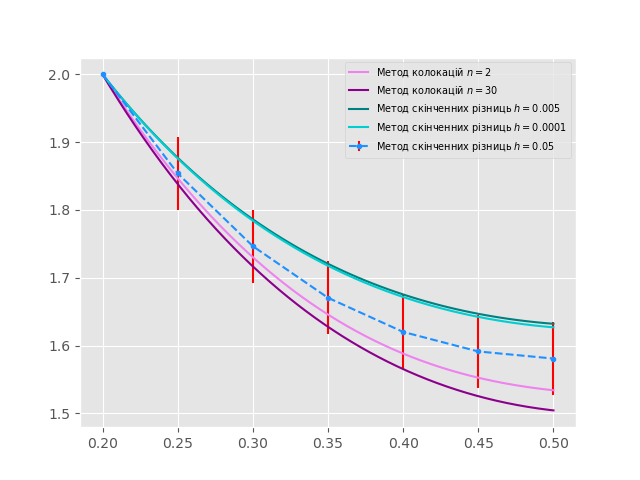

In [13]:
X = np.linspace(0.2,0.5,500)

plt.plot(X, np.array(list(map(y_n, X))),
         label="Метод колокацій $n=2$", color='violet'
        )
plt.plot(X, np.array(list(map(сollocation_method(n=30), X))),
         label="Метод колокацій $n=30$", color='darkmagenta'
        )
plt.errorbar(x, y_h,fmt='--.', label="Метод скінченних різниць $h=0.05$",
             yerr=[0]+[0.054]*(len(x)-1), ecolor='red',
             color='dodgerblue'
            )
plt.plot(*finite_difference_method(0.005),
         label="Метод скінченних різниць $h=0.005$",
         color='teal'
        )
x_f, y_f = finite_difference_method(0.0001)
plt.plot(x_f, y_f,
         label="Метод скінченних різниць $h=0.0001$",
         color='darkturquoise'
        )
plt.legend(fontsize=7);

Оцінки розв'язків відрізняються по мірі наближення до правого кінця відрізку. При збільшенні кількості вузлів метод скінченних різниць явно збігається до функції, що хоч і відрізняється в розв'язку с кроком $h=0.05$, проте лежить на верхній межі допустимої похибки, розрахованнної за наближенною формулою (пункт 1.4*).
Наближений розв'язок методу коллокацій з двома базисними функціями лежить на протилежній межі цієї області, проте при збільшенні їх кількості виходить за неї.

Можна припустити, що похибка методу скінченних різниць накопичується по мірі наближення до правого краю (1.4), а в методі колокацій розподілена більш рівномірно через рівномірність розміщення вузлів коллокації. Перевіримо, обравши інші вузли коллокацій:

<IPython.core.display.Javascript object>


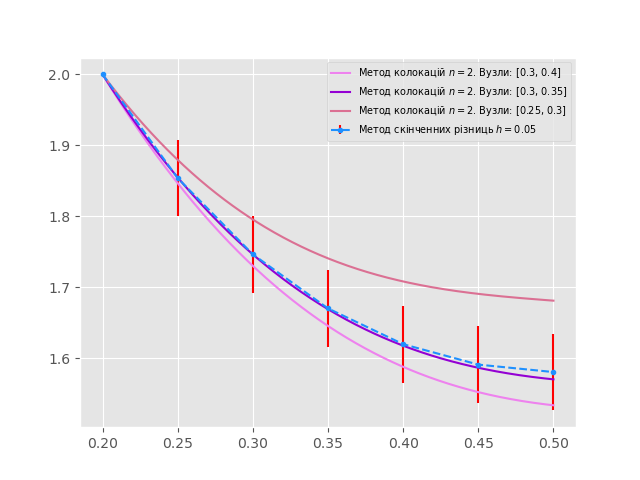

In [14]:
plt.plot(X, np.array(list(map(y_n, X))),
         label="Метод колокацій $n=2$. Вузли: [0.3, 0.4]", color='violet'
         )
plt.plot(X, np.array(list(map(сollocation_method(n=2,nodes=[0.3,0.35]), X))),
         label="Метод колокацій $n=2$. Вузли: [0.3, 0.35]", color='darkviolet'
         )
plt.plot(X, np.array(list(map(сollocation_method(n=2,nodes=[0.25,0.3]), X))),
         label="Метод колокацій $n=2$. Вузли: [0.25, 0.3]", color='palevioletred'
         )
plt.errorbar(x, y_h,fmt='--.', label="Метод скінченних різниць $h=0.05$",
             yerr=[0]+[0.054]*(len(x)-1), ecolor='red',
             color='dodgerblue'
             )
plt.legend(fontsize=7);

Видно, що метод колокацій сильно залежить від обраних вузлів колокацій, принаймні при малій їх кількості. Не маючи інформації щодо оцінки його точності та можливості порівняти з дійсним розв'язком, можна вважати що точність цього методу при малій кількості вузлів дуже сумнівна. Проте, можна припустити, що при великій кількості рівномірно розподілених вузлів, наближений розв'язок буде відповідати дійсності.

Також на точність могла вплинути точність комп'ютерного представлення використаного програмного забезпечення: мови програмування `Python` та відповідних пакетів.